In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import t

In [16]:
baseline_GAT  = [0.4649123,0.42982456, 0.40350878, 0.47807017, 0.44956142, 0.4364035, 0.45394737, 0.40350878, 0.4342105, 0.4890351]
random_walk_rewired_GAT = [0.6052631735801697, 0.6162280440330505, 0.5986841917037964, 0.5833333134651184, 0.6074561476707458, 0.5877193212509155, 0.5021929740905762, 0.5701754093170166, 0.6052631735801697, 0.6118420958518982]

bgat_acc = np.mean(baseline_GAT)
rwrgat_acc = np.mean(random_walk_rewired_GAT)

bgat_std = np.std(baseline_GAT)
rwrgat_std = np.std(random_walk_rewired_GAT)

dof = len(baseline_GAT)-1 
confidence = 0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))

bgat_ci = (bgat_acc-bgat_std*t_crit/np.sqrt(len(baseline_GAT)), bgat_acc+bgat_std*t_crit/np.sqrt(len(baseline_GAT))) 
rwrgat_ci = (rwrgat_acc-rwrgat_std*t_crit/np.sqrt(len(random_walk_rewired_GAT)), rwrgat_acc+rwrgat_std*t_crit/np.sqrt(len(random_walk_rewired_GAT))) 

df = pd.DataFrame({'acc': [bgat_acc,rwrgat_acc]})
df.index = ['baseline_GAT', 'random_walk_rewired_GAT']
yerr= np.array([bgat_std, rwrgat_std])
yerr

array([0.02718237, 0.03185869])

In [20]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

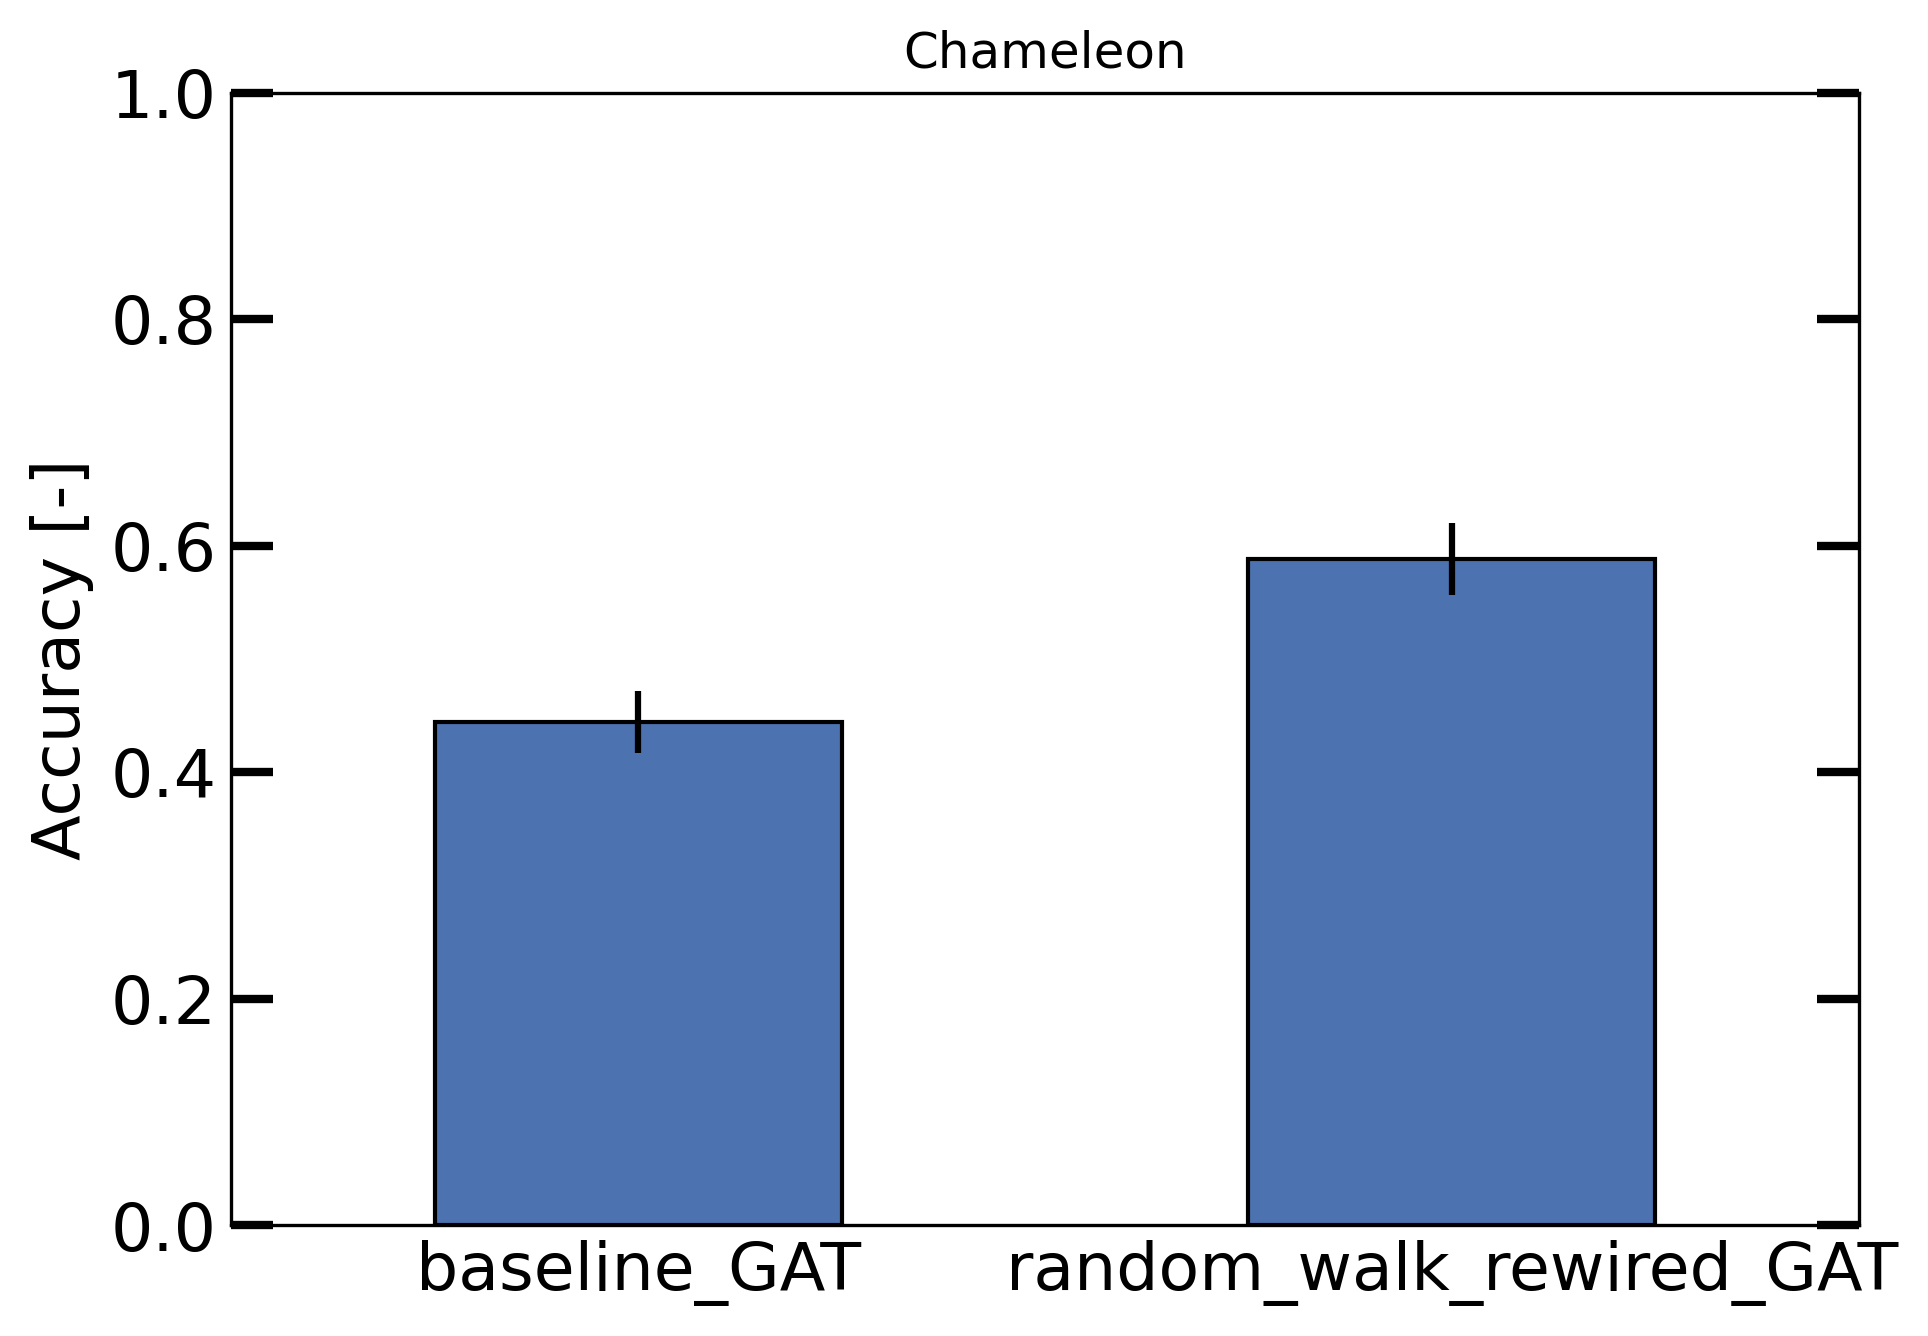

In [21]:
sns.set_palette(sns.color_palette("deep",9))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
df.plot.bar(rot=0, figsize=(7,5), edgecolor='black', yerr=yerr, ax=ax)
ax.set_ylabel('Accuracy [-]', fontsize=16)
ax.set_ylim(0,1)
ax.set_title('Chameleon')
ax.get_legend().remove()
ax.xaxis.set_tick_params(which='major', size=0, width=2, direction='in', top='off', labelsize=16)
ax.xaxis.set_tick_params(which='minor', size=0, width=2, direction='in', top='off', labelsize=16)
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='off', labelsize=16)
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='off', labelsize=16)